In [11]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import gym
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

ENV = 'CartPole-v0'
NUM_DIGITIZED = 6
GAMMA = 0.99  #時間割引率
ETA = 0.5  #学習係数
MAX_STEPS = 200
NUM_EPISODES = 1000


def display_frames_as_gif(frames):
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=50)
    anim.save('movie_cartpole.mp4')
    display(display_animation(anim, default_mode='loop'))


In [3]:
frames = []
env = gym.make(ENV)
observation = env.reset()

for step in range(0,200):
    frames.append(env.render(mode='rgb_array'))
    action = np.random.choice(2)
    observation, reward, done, info = env.step(action)

WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.


In [4]:
class Agent:
    def __init__(self, num_states, num_actions):
        self.brain = Brain(num_states, num_actions)
    
    def update_Q_function(self, observation, action, reward, observation_next):
        self.brain.update_Q_table(observation, action, reward, observation_next)
        
    def get_action(self, observation, step):
        action = self.brain.decide_action(observation, step)
        return action

In [21]:
class Brain:
    def __init__(self, num_states, num_actions):
        self.num_actions = num_actions
        self.q_table = np.random.uniform(low=0, high=1, size=(NUM_DIGITIZED ** num_states, num_actions))

    def bins(self, clip_min, clip_max, num):
        # linspace: 等間隔の数列を返す
        # [1:-1]2つ目から最後から1つ手前まで
        return np.linspace(clip_min, clip_max, num + 1)[1:-1]

    def digitize_state(self, observation):
        cart_pos, cart_v, pole_angle, pole_v = observation
        digitized = [
            np.digitize(cart_pos, bins=self.bins(-2.4, 2.4, NUM_DIGITIZED)),
            np.digitize(cart_v, bins=self.bins(-3.0, 3.0, NUM_DIGITIZED)),
            np.digitize(pole_angle, bins=self.bins(-0.5, 0.5, NUM_DIGITIZED)),
            np.digitize(pole_v, bins=self.bins(-2.0, 2.0, NUM_DIGITIZED))
        ]
        return sum([x * (NUM_DIGITIZED ** i) for i, x in enumerate(digitized)])

    def update_Q_table(self, observation, action, reward, observation_next):
        state = self.digitize_state(observation)
        state_next = self.digitize_state(observation_next)
        Max_Q_next = max(self.q_table[state_next][:])
        self.q_table[state, action] = self.q_table[state, action] + ETA * (reward + GAMMA * Max_Q_next - self.q_table[state, action])

    def decide_action(self, observation, episode):
        state = self.digitize_state(observation)
        epsilon = 0.5 * (1 / (episode + 1))
        
        if epsilon <= np.random.uniform(0, 1):
            action = np.argmax(self.q_table[state][:])
        else:
            action = np.random.choice(self.num_actions)
        return action

In [9]:
class Environment:
    def __init__(self):
        self.env = gym.make(ENV)
        num_states = self.env.observation_space.shape[0]
        num_actions = self.env.action_space.n
        self.agent = Agent(num_states, num_actions)
        
    def run(self):
        complete_episodes = 0
        is_episode_final = False
        frames = []
        
        for episode in range(NUM_EPISODES):
            observation = self.env.reset()
            
            for step in range(MAX_STEPS):
                if is_episode_final is True:
                    frames.append(self.env.render(mode='rgb_array'))
                
                action = self.agent.get_action(observation, episode)
                observation_next, _, done, _ = self.env.step(action)
                
                if done:
                    if step < 195:
                        reward = -1
                        complete_episodes = 0
                    else:
                        reward = 1
                        complete_episodes += 1
                else:
                    reward = 0
                    
                self.agent.update_Q_function(observation, action, reward, observation_next)
                
                observation = observation_next
                
                if done:
                    print('{0} Episode: Finished after {1} time steps'.format(episode, step + 1))
                    break
                    
            if is_episode_final:
                display_frames_as_gif(frames)
                break
                
            if complete_episodes >= 10:
                print('10回連続成功')
                is_episode_final = True

0 Episode: Finished after 41 time steps
1 Episode: Finished after 55 time steps
2 Episode: Finished after 14 time steps
3 Episode: Finished after 21 time steps
4 Episode: Finished after 28 time steps
5 Episode: Finished after 17 time steps
6 Episode: Finished after 10 time steps
7 Episode: Finished after 20 time steps
8 Episode: Finished after 16 time steps
9 Episode: Finished after 28 time steps
10 Episode: Finished after 30 time steps
11 Episode: Finished after 14 time steps
12 Episode: Finished after 30 time steps
13 Episode: Finished after 21 time steps


14 Episode: Finished after 19 time steps
15 Episode: Finished after 23 time steps
16 Episode: Finished after 13 time steps
17 Episode: Finished after 18 time steps
18 Episode: Finished after 60 time steps
19 Episode: Finished after 66 time steps
20 Episode: Finished after 20 time steps
21 Episode: Finished after 40 time steps
22 Episode: Finished after 48 time steps
23 Episode: Finished after 51 time steps
24 Episode: Finished after 56 time steps
25 Episode: Finished after 78 time steps
26 Episode: Finished after 37 time steps
27 Episode: Finished after 43 time steps
28 Episode: Finished after 10 time steps
29 Episode: Finished after 72 time steps
30 Episode: Finished after 47 time steps
31 Episode: Finished after 68 time steps
32 Episode: Finished after 77 time steps
33 Episode: Finished after 40 time steps
34 Episode: Finished after 89 time steps
35 Episode: Finished after 9 time steps
36 Episode: Finished after 28 time steps
37 Episode: Finished after 73 time steps
38 Episode: Finis

39 Episode: Finished after 99 time steps
40 Episode: Finished after 79 time steps
41 Episode: Finished after 78 time steps
42 Episode: Finished after 27 time steps
43 Episode: Finished after 111 time steps
44 Episode: Finished after 23 time steps
45 Episode: Finished after 17 time steps


46 Episode: Finished after 21 time steps
47 Episode: Finished after 52 time steps
48 Episode: Finished after 24 time steps
49 Episode: Finished after 10 time steps
50 Episode: Finished after 56 time steps
51 Episode: Finished after 38 time steps
52 Episode: Finished after 153 time steps
53 Episode: Finished after 89 time steps
54 Episode: Finished after 88 time steps
55 Episode: Finished after 85 time steps
56 Episode: Finished after 116 time steps
57 Episode: Finished after 92 time steps
58 Episode: Finished after 94 time steps
59 Episode: Finished after 51 time steps
60 Episode: Finished after 46 time steps
61 Episode: Finished after 32 time steps
62 Episode: Finished after 51 time steps
63 Episode: Finished after 161 time steps
64 Episode: Finished after 47 time steps
65 Episode: Finished after 18 time steps
66 Episode: Finished after 28 time steps


67 Episode: Finished after 104 time steps
68 Episode: Finished after 29 time steps
69 Episode: Finished after 32 time steps
70 Episode: Finished after 200 time steps
71 Episode: Finished after 27 time steps
72 Episode: Finished after 200 time steps
73 Episode: Finished after 51 time steps
74 Episode: Finished after 38 time steps


75 Episode: Finished after 33 time steps
76 Episode: Finished after 200 time steps
77 Episode: Finished after 35 time steps
78 Episode: Finished after 200 time steps
79 Episode: Finished after 200 time steps


80 Episode: Finished after 200 time steps
81 Episode: Finished after 21 time steps
82 Episode: Finished after 200 time steps
83 Episode: Finished after 200 time steps
84 Episode: Finished after 200 time steps
85 Episode: Finished after 115 time steps
86 Episode: Finished after 200 time steps
87 Episode: Finished after 20 time steps
88 Episode: Finished after 200 time steps
89 Episode: Finished after 200 time steps
90 Episode: Finished after 200 time steps


91 Episode: Finished after 200 time steps
92 Episode: Finished after 200 time steps
93 Episode: Finished after 188 time steps
94 Episode: Finished after 26 time steps
95 Episode: Finished after 51 time steps
96 Episode: Finished after 71 time steps
97 Episode: Finished after 42 time steps


98 Episode: Finished after 116 time steps
99 Episode: Finished after 200 time steps
100 Episode: Finished after 23 time steps
101 Episode: Finished after 36 time steps
102 Episode: Finished after 104 time steps
103 Episode: Finished after 23 time steps
104 Episode: Finished after 28 time steps
105 Episode: Finished after 156 time steps
106 Episode: Finished after 154 time steps
107 Episode: Finished after 152 time steps
108 Episode: Finished after 105 time steps
109 Episode: Finished after 60 time steps
110 Episode: Finished after 200 time steps


111 Episode: Finished after 200 time steps
112 Episode: Finished after 152 time steps
113 Episode: Finished after 114 time steps
114 Episode: Finished after 100 time steps
115 Episode: Finished after 154 time steps
116 Episode: Finished after 200 time steps
117 Episode: Finished after 74 time steps
118 Episode: Finished after 200 time steps
119 Episode: Finished after 101 time steps
120 Episode: Finished after 192 time steps
121 Episode: Finished after 200 time steps
122 Episode: Finished after 172 time steps
123 Episode: Finished after 146 time steps
124 Episode: Finished after 173 time steps
125 Episode: Finished after 138 time steps
126 Episode: Finished after 129 time steps
127 Episode: Finished after 200 time steps
128 Episode: Finished after 200 time steps
129 Episode: Finished after 200 time steps
130 Episode: Finished after 200 time steps
131 Episode: Finished after 200 time steps
132 Episode: Finished after 200 time steps
133 Episode: Finished after 200 time steps
134 Episode:

137 Episode: Finished after 200 time steps


/Users/maeda/miniconda3/lib/python3.6/site-packages/matplotlib/animation.py:1218: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


ValueError: outfile must be *.htm or *.html

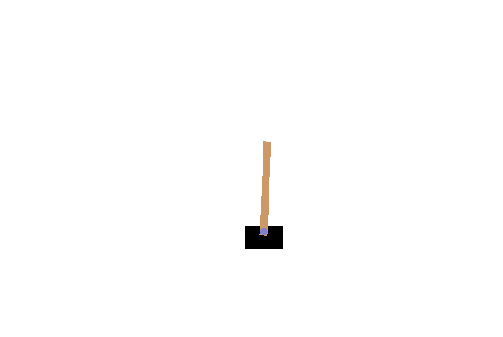

In [22]:
cartpole_env = Environment()
cartpole_env.run()
